- Aluno: Vítor Gabriel Reis Caitité
- Matrícula: 2021712430


# Implementação das funções de pertinência

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from math import *
from sklearn.metrics import mean_squared_error
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [2]:
def trimf(x,a,b,c):
    y = np.zeros(len(x))
    for i in range(len(x)):
        y[i] = max([min([(x[i]-a)/(b-a), (c-x[i])/(c-b)]), 0])
    return y

def gaussmf(x,c,sigma):
    return e**(-1/2 * ((x-c)/sigma)**2)

def trapmf(x,a,b,c,d):
    y = np.zeros(len(x))
    for i in range(len(x)):
        if x[i] > a and x[i] <= b:
            y[i] = (x[i]-a)/(b-a)
        if x[i] > b and x[i] <= c:
            y[i] = 1
        if x[i] > c and x[i] < d:
            y[i] = (-x[i]+d)/(-c+d)
    return y

def gbellmf(x, a, b, c):
    return 1/(1+abs(((x-c)/a)**(2*b)))

def sigmf(x, c, a):
    return 1/(1 + e**(-a*(x-c)))   

# Questão 1 - Parábola

Aproximar a função $y = x^2, x \in [ 0, 2]$, empregando os mecanismos de inferência do
Mamdani e do Sugeno (linear e constante).

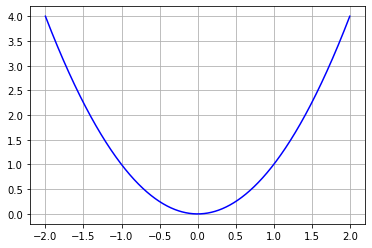

In [3]:
# Universe Variables:
x = np.linspace(-2, 2, 2000)
y = np.linspace(0, 4, 5000)
y_real = x**2
plt.plot(x, y_real, 'b-')
plt.grid()

## Mecanismo de Inferência de Mandani

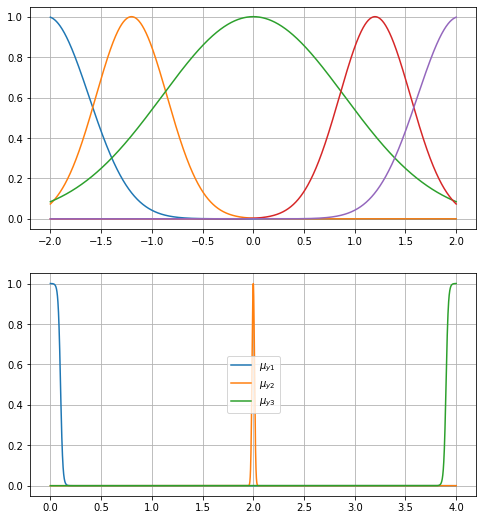

In [4]:
# Membership Functions
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(8, 9))
mu_x_1 = gaussmf(x, -2.03, 0.41)
mu_x_2 = gaussmf(x, -1.2, 0.35)
mu_x_3 = gaussmf(x, 0, 0.9)
mu_x_4 = gaussmf(x, 1.2, 0.35)
mu_x_5 = gaussmf(x, 2.03, 0.41)
ax0.plot(x, mu_x_1,'-',x, mu_x_2,'-', x, mu_x_3,'-', x, mu_x_4,'-', x, mu_x_5,'-')
legend = plt.legend([r'$\mu_{x1}$', r'$\mu_{x2}$', r'$\mu_{x3}$', r'$\mu_{x4}$', r'$\mu_{x5}$'])
ax0.grid()

mu_y_1 = sigmf(y, 0.1, -90)
mu_y_2 = gaussmf(y, 2, 0.012)
mu_y_3 = sigmf(y, 3.9, 90)
ax1.plot(y, mu_y_1,'-',y, mu_y_2,'-', y, mu_y_3,'-')
legend = plt.legend([r'$\mu_{y1}$', r'$\mu_{y2}$', r'$\mu_{y3}$'])
ax1.grid()

In [5]:
y_hat = []
for xi in x:
    # Activation of our fuzzy membership functions at these values.
    x1 = fuzz.interp_membership(x, mu_x_1, xi)
    x2 = fuzz.interp_membership(x, mu_x_2, xi)
    x3 = fuzz.interp_membership(x, mu_x_3, xi)
    x4 = fuzz.interp_membership(x, mu_x_4, xi)
    x5 = fuzz.interp_membership(x, mu_x_5, xi)
    
    # Rule application
    y_1 = np.fmin(np.fmax(x1, x5), mu_y_3)
    y_2 = np.fmin(np.fmax(x2, x4), mu_y_2)
    y_3 = np.fmin(x3, mu_y_1)
    
    # Aggregate all three output membership functions together
    aggregated = np.fmax(y_1, np.fmax(y_2, y_3))
    
    # Calculate defuzzified result
    y_hat.append(fuzz.defuzz(y, aggregated, 'centroid'))

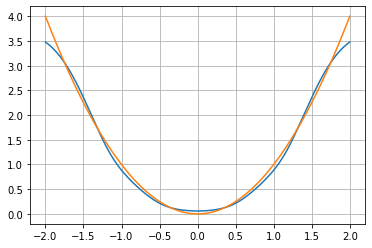

In [6]:
plt.plot(x, y_hat, x, y_real)
plt.grid()

In [7]:
mean_squared_error(y_real, y_hat)

0.013967729852900082

## Mecanismo de Inferência de Sugeno (Constante)

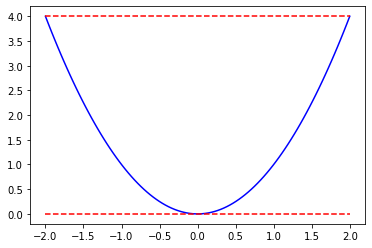

In [8]:
x = np.linspace(-2, 2, 100)
y = np.linspace(0, 4, 100)
y_real = x**2
y1 = np.ones(100)*(4)
y2 = np.ones(100)*(0)
plt.plot(x, y_real, 'b-', x, y1,'r--', x, y2, 'r--')

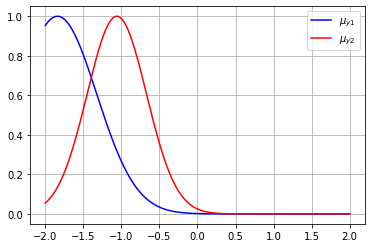

In [9]:
x = np.linspace(-2, 2, 500)
y = x**2
y1 = np.ones(500)*(4)
y2 = np.ones(500)*(0)
mu_y1 = gaussmf(x, -1.84, -0.516)
mu_y2 = gaussmf(x, -1.06, 0.39)
#mu_y3 = gaussmf(x, v[4],v[5])
plt.plot(x,mu_y1,'b-',x,mu_y2,'r-')
legend = plt.legend([r'$\mu_{y1}$', r'$\mu_{y2}$'])
plt.grid()

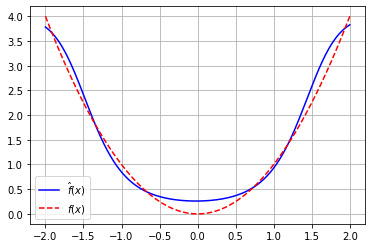

In [10]:
div = mu_y1 + mu_y2
div[div==0] = 0.00001

y_hat = np.divide(np.multiply(mu_y1, y1) + np.multiply(mu_y2, y2), div )
plt.plot(x,y_hat,'b-',x,y,'r--')
legend = plt.legend([r'$\hat{f}(x)$', r'$f(x)$'])
plt.grid()

## Mecanismo de Inferência de Sugeno 

### 2 Regras, pertinência do tipo triangular 

$y_1 = 2x, \ \ \ \ \ \ \mu_{y1} = \mathrm{trimf}(x,-2, -2, 4)$

$y_2 = -2x, \ \ \ \ \mu_{y2} = \mathrm{trimf}(x,-2, 2, 2)$

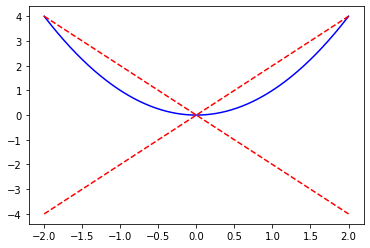

In [11]:
y1 = -2*x
y2 = 2*x
plt.plot(x,y,'b-',x,y1,'r--', x, y2, 'r--')

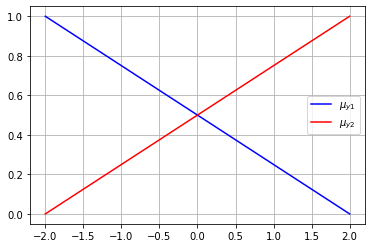

In [12]:
mu_y1 = trimf(x, -3, -2 ,2)
mu_y2 = trimf(x, -2, 2, 3)
plt.plot(x,mu_y1,'b-',x,mu_y2,'r-')
legend = plt.legend([r'$\mu_{y1}$', r'$\mu_{y2}$'])
plt.grid()

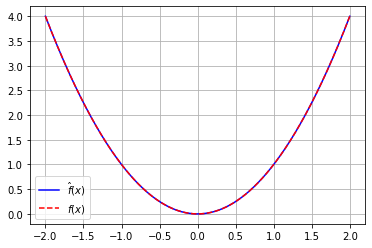

In [13]:
div = mu_y1 + mu_y2 
div[div==0] = 0.001

y_hat = np.divide(np.multiply(mu_y1, y1) + np.multiply(mu_y2, y2), div )
plt.plot(x,y_hat,'b-',x,y,'r--')
legend = plt.legend([r'$\hat{f}(x)$', r'$f(x)$'])
plt.grid()

In [14]:
mean_squared_error(list(y), list(y_hat))

3.2985974622557315e-32

### 2 Regras, pertinência do tipo gaussiana 

$y_1 = 2x, \ \ \ \ \ \ \mu_{y1} = \mathrm{gauss}(x, 0.74, -2.6)$

$y_2 = -2x, \ \ \ \ \mu_{y2} = \mathrm{gauss}(x, -0.74, 2.6)$

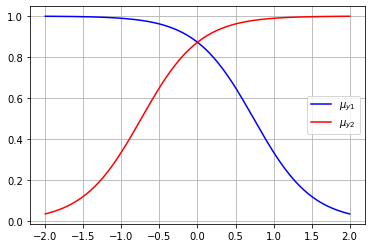

In [15]:
x = np.linspace(-2, 2, 200)
y = x**2
y1 = -2*x
y2 = 2*x
mu_y1 = sigmf(x, 0.74, -2.6)
mu_y2 = sigmf(x, -0.74, 2.6)
#mu_y3 = gaussmf(x, v[4],v[5])
plt.plot(x,mu_y1,'b-',x,mu_y2,'r-')
legend = plt.legend([r'$\mu_{y1}$', r'$\mu_{y2}$'])
plt.grid()

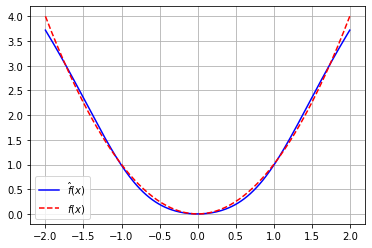

In [16]:
div = mu_y1 + mu_y2
div[div==0] = 0.00001

y_hat = np.divide(np.multiply(mu_y1, y1) + np.multiply(mu_y2, y2), div )
plt.plot(x,y_hat,'b-',x,y,'r--')
legend = plt.legend([r'$\hat{f}(x)$', r'$f(x)$'])
plt.grid()

In [17]:
mean_squared_error(list(y), list(y_hat))

0.0060465477165923195

# Questão 1 - Função Sinc

$y = \sin(x)/x, x \in \left[ 0, 2\pi \right]$

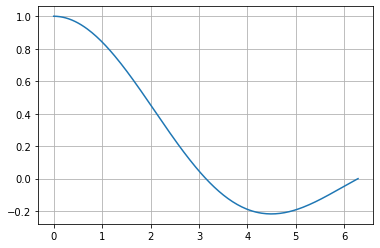

In [18]:
x = np.linspace(0.0001,2*pi,200)
y = np.linspace(-1, 1, 200)
y_real = np.sin(x)/x
plt.plot(x, y_real)
plt.grid()

## Mecanismo de Inferência de Mandani

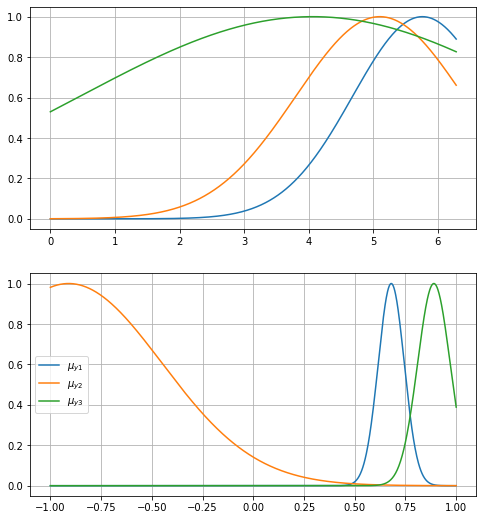

In [19]:
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(8, 9))
x = np.linspace(0.000001,2*pi,1000)
y = np.linspace(-1, 1, 1000)
y_real = np.sin(x)/x
mu_x_1 = gaussmf(x, 5.76, 1.08)
mu_x_2 = gaussmf(x, 5.1, 1.3)
mu_x_3 = gaussmf(x, 4.06, 3.6)

ax0.plot(x, mu_x_1,'-', x, mu_x_2,'-', x, mu_x_3,'-')
legend = plt.legend([r'$\mu_{x1}$', r'$\mu_{x2}$', r'$\mu_{x3}$', r'$\mu_{x4}$', r'$\mu_{x5}$'])
ax0.grid()

mu_y_1 = gaussmf(y, 0.68, 0.064)
mu_y_2 = gaussmf(y, -0.91, 0.46)
mu_y_3 = gaussmf(y, 0.89, 0.08)
ax1.plot(y, mu_y_1,'-', y, mu_y_2,'-', y, mu_y_3,'-')
legend = plt.legend([r'$\mu_{y1}$', r'$\mu_{y2}$', r'$\mu_{y3}$'])
ax1.grid()
y_hat = []
for xi in x:
    # Activation of our fuzzy membership functions at these values.
    x1 = fuzz.interp_membership(x, mu_x_1, xi)
    x2 = fuzz.interp_membership(x, mu_x_2, xi)
    x3 = fuzz.interp_membership(x, mu_x_3, xi)
    
    # Rule application
    y_1 = np.fmin(x1, mu_y_1)
    y_2 = np.fmin(x2, mu_y_2)
    y_3 = np.fmin(x3, mu_y_3)
    
    # Aggregate all three output membership functions together
    aggregated = np.fmax(y_1, np.fmax(y_2, y_3))
    
    # Calculate defuzzified result
    y_hat.append(fuzz.defuzz(y, aggregated, 'centroid')) 

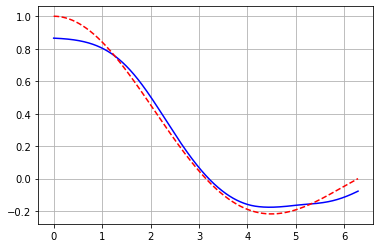

In [20]:
plt.plot(x, y_hat, 'b', x, y_real, 'r--')
plt.grid()

In [21]:
mean_squared_error(y_real, y_hat)

0.0029259400791651355

## Mecanismo de Inferência de Sugeno (Constante)

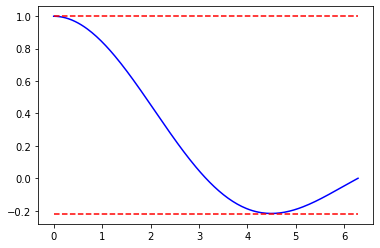

In [22]:
x = np.linspace(0.0001,2*pi,200)
y = np.linspace(-1, 1, 200)
y_real = np.sin(x)/x
y1 = np.ones(len(x))*1
y2 = np.ones(len(x))*(-0.22)
plt.plot(x,y_real,'b-',x,y1,'r--', x, y2, 'r--')

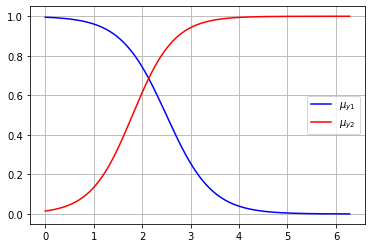

In [23]:
x = np.linspace(0.0001,2*pi,500)
y = np.sin(x)/x
y1 = np.ones(500)*(1)
y2 = np.ones(500)*(-0.22)
mu_y1 = sigmf(x, 2.5, -2.13)
mu_y2 = sigmf(x, 1.8, 2.33)
#mu_y3 = gaussmf(x, v[4],v[5])
plt.plot(x,mu_y1,'b-',x,mu_y2,'r-')
legend = plt.legend([r'$\mu_{y1}$', r'$\mu_{y2}$'])
plt.grid()

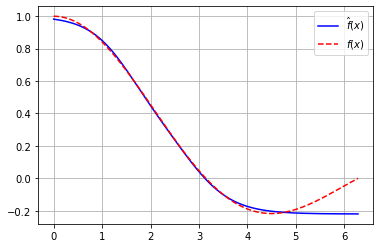

In [24]:
div = mu_y1 + mu_y2
div[div==0] = 0.00001

y_hat = np.divide(np.multiply(mu_y1, y1) + np.multiply(mu_y2, y2), div )
plt.plot(x,y_hat,'b-',x,y,'r--')
legend = plt.legend([r'$\hat{f}(x)$', r'$f(x)$'])
plt.grid()

In [25]:
mean_squared_error(y, y_hat)

0.003543258598444329

## Mecanismo de Inferência de Sugeno (Linear)

### 3 Regras, pertinência tipo gaussiana:

$y_1 = 1,  \ \ \ \ \ \ \ \ \ \ \ \ \  \ \ \ \ \ \ \ \ \mu_{y1} = \mathrm{trimf}(x,-\pi,0,\pi)$

$y_2 = -\dfrac{x}{3} + 1.1, \ \ \ \ \ \ \mu_{y2} = \mathrm{trimf}(x,0,\pi,2\pi)$

$y_3 = \dfrac{x}{8} - 0.8, \ \ \ \ \ \ \ \ \ \mu_{y3} = \mathrm{trimf}(x,\pi,2\pi,3\pi)$

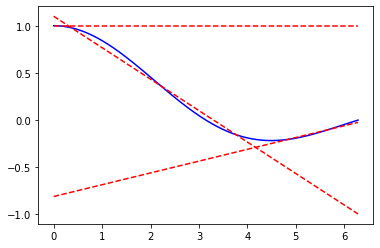

In [26]:
y1 = np.ones(len(x))
y2 = -x/3 + 1.1
y3 = x/8-0.81
plt.plot(x,y,'b-',x,y1,'r--', x, y2, 'r--', x, y3, 'r--')

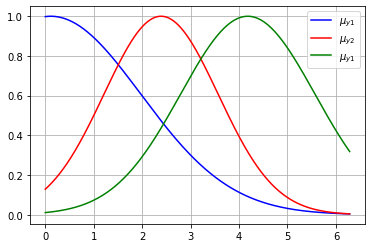

In [27]:
mu_y1 = gaussmf(x, 0.115, 1.86)
mu_y2 = gaussmf(x, 2.39, 1.18)
mu_y3 = gaussmf(x, 4.18, 1.39)
plt.plot(x,mu_y1,'b-',x,mu_y2,'r-',x, mu_y3,'g-')
legend = plt.legend([r'$\mu_{y1}$', r'$\mu_{y2}$', r'$\mu_{y1}$'])
plt.grid()

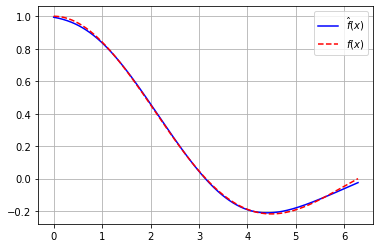

In [28]:
div = mu_y1 + mu_y2 + mu_y3
div[div==0] = 0.001

y_hat = np.divide(np.multiply(mu_y1, y1) + np.multiply(mu_y2, y2) + np.multiply(mu_y3, y3), div )
plt.plot(x,y_hat,'b-',x,y,'r--')
legend = plt.legend([r'$\hat{f}(x)$', r'$f(x)$'])
plt.grid()

In [29]:
mean_squared_error(list(y), list(y_hat))

6.8602488937589e-05

# Questão 2 - Classificação de Padrões

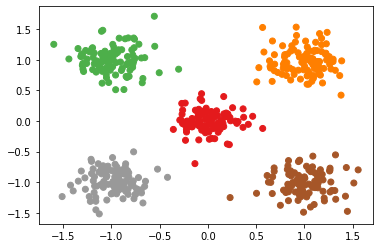

In [30]:
from sklearn.datasets import make_blobs
# centers of the blobs
centers = [(0,0), (-1,1), (1,1), (1,-1), (-1,-1)]

# create the sample
X, y = make_blobs(n_samples=500, n_features=2, cluster_std=0.2, centers=centers, shuffle=False)
y[np.where(y==4)] = 5
y[np.where(y==3)] = 4
y[np.where(y==2)] = 3
y[np.where(y==1)] = 2
y[np.where(y==0)] = 1
plt.scatter(X[:,0], X[:,1], c=y-1, cmap="Set1")

In [31]:
import math
def kgaussian(x, center, h):
    u = math.sqrt(sum((x - center)**2))/h
    K = 1/(math.sqrt(2*np.pi)*h) * math.exp(-0.5*(u**2))
    return K

Text(0.5, 1.0, 'Superfície de Separação Teórica')

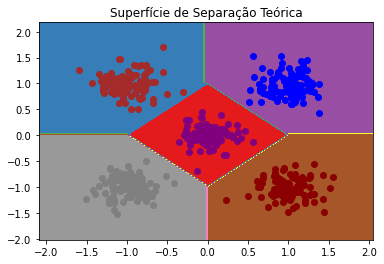

In [32]:
fig = plt.figure()
# decision surface for logistic regression on a binary classification dataset
min1, max1 = X[:, 0].min()-0.5, X[:, 0].max()+0.5
min2, max2 = X[:, 1].min()-0.5, X[:, 1].max()+0.5
# define the x and y scale
x1grid = np.arange(min1, max1, 0.05)
x2grid = np.arange(min2, max2, 0.05)
# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))
# make predictions for the grid
y_hat = []
centers = [[0,0], [-1,1], [1,1], [1,-1], [-1,-1]]
for x in grid:
    gaussian = []
    for center in centers:
        gaussian.append(kgaussian(x, center, 0.2))
    y_hat.append(np.argmax(gaussian))
y_hat=np.array(y_hat)
# reshape the predictions back into a grid
zz = y_hat.reshape(xx.shape)
# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Set1')
# create scatter plot for samples from each class
colors=['purple', "brown", 'blue', 'darkred', 'gray']
for class_value in [1, 2, 3, 4, 5]:
    # get row indexes for samples with this class
    row_ix = np.where(y == class_value)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1], c=colors[class_value-1])
plt.title("Superfície de Separação Teórica")

In [33]:
# inputs (Antecedents): x1, x2
# output (Consequents): y 
x1 = ctrl.Antecedent(np.linspace(-2, 2, 600), 'x1')
x2 = ctrl.Antecedent(np.linspace(-2, 2, 600), 'x2')
y = ctrl.Consequent(np.linspace(1, 5, 600), 'y')

/home/vitor/-/.virtualenvs/k36/lib/python3.6/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


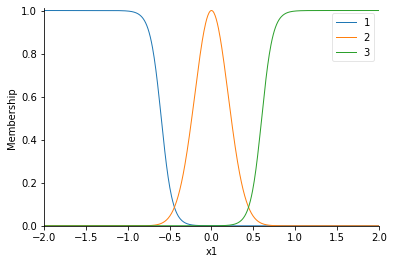

In [34]:
# Membership Functions
x1['1'] = fuzz.sigmf(x1.universe, -0.6, -15)
x1['2'] = fuzz.gaussmf(x1.universe, 0, 0.2)
x1['3'] = fuzz.sigmf(x1.universe, 0.6, 15)
x1.view()

/home/vitor/-/.virtualenvs/k36/lib/python3.6/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


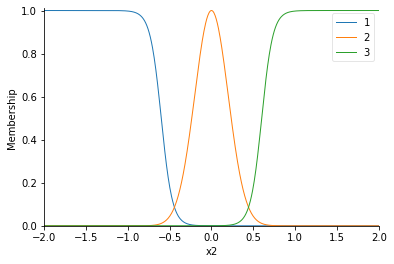

In [35]:
# Membership Functions
x2['1'] = fuzz.sigmf(x2.universe, -0.6, -15)
x2['2'] = fuzz.gaussmf(x2.universe, 0, 0.2)
x2['3'] = fuzz.sigmf(x2.universe, 0.6, 15)
x2.view()

/home/vitor/-/.virtualenvs/k36/lib/python3.6/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


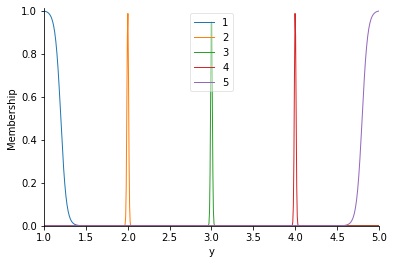

In [36]:
# Membership Functions
y['1'] = fuzz.sigmf(y.universe, 1.2, -30)
y['2'] = fuzz.gaussmf(y.universe, 2, 0.01)
y['3'] = fuzz.gaussmf(y.universe, 3, 0.01)
y['4'] = fuzz.gaussmf(y.universe, 4, 0.01)
y['5'] = fuzz.sigmf(y.universe, 4.8, 30)
y.view()

In [37]:
rule_1 = ctrl.Rule(x1['2'] & x2['2'], y['1'])
rule_2 = ctrl.Rule(x1['1'] & x2['3'], y['2'])
rule_3 = ctrl.Rule(x1['3'] & x2['3'], y['3'])
rule_4 = ctrl.Rule(x1['3'] & x2['1'], y['4'])
rule_5 = ctrl.Rule(x1['1'] & x2['1'], y['5'])

In [38]:
ctrl_ = ctrl.ControlSystem([rule_1, rule_2, rule_3, rule_4, rule_5])
inf = ctrl.ControlSystemSimulation(ctrl_)

In [39]:
x_1 = np.linspace(-2, 2, 100)
x_2 = np.linspace(-2, 2, 100)

In [40]:
def fun(X, Y):
    Z = []
    for x in X:
        for y in Y:
            inf.input['x1'] = x
            inf.input['x2'] = y
            inf.compute()
            Z.append(inf.output['y'])
    return Z

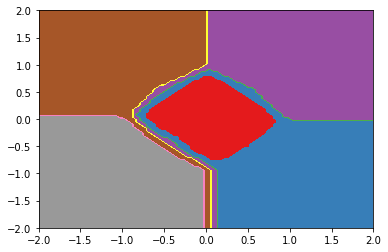

In [41]:
X, Y = np.meshgrid(x_1, x_2)
zs = np.array(fun(x_1, x_2))
zs = np.around(zs, 0)
Z = zs.reshape(X.shape)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.contourf(X, Y, Z, cmap='Set1')

## Usando Modelo de Sugeno:

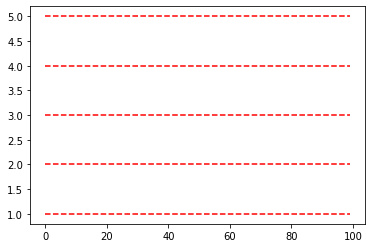

In [42]:
x_1 = np.linspace(-2, 2, 100)
x_2 = np.linspace(-2, 2, 100)
y1 = np.ones(100)*1
y2 = np.ones(100)*2
y3 = np.ones(100)*3
y4 = np.ones(100)*4
y5 = np.ones(100)*5
plt.plot(y1,'r--', y2, 'r--', y3, 'r--', y4, 'r--', y5, 'r--')

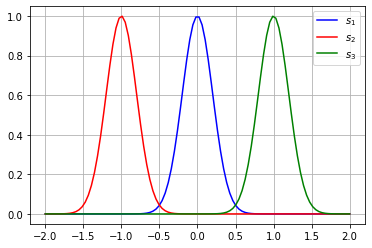

In [43]:
s1 = gaussmf(x_1, 0, 0.2)
s2 = gaussmf(x_1, -1, 0.2)
s3 = gaussmf(x_1, 1, 0.2)
plt.plot(x_1, s1,'b-',x_1, s2,'r-', x_1, s3,'g-')
legend = plt.legend([r'$s_1$', r'$s_2$', r'$s_3$'])
plt.grid()

In [44]:
def fun2(X1, X2):
    y_hat = []
    for x1 in X:
        s1 = gaussmf(x1, 0, 0.2)
        s2 = gaussmf(x1, -1, 0.2)
        s3 = gaussmf(x1, 1, 0.2)
        for x2 in X2:
            t1 = gaussmf(x2, 0, 0.2)
            t2 = gaussmf(x2, -1, 0.2)
            t3 = gaussmf(x2, 1, 0.2)
            # Rules:
            # Se x1 = 0 e y1 = 0 então y = 1:
            w1 = np.multiply(s1, t1)
            # Se x1 = -1 e x2 = 1  entao y = 2
            w2 = np.multiply(s2, t3)
            # Se x1 = 1 e x2 = 1 entao y = 3
            w3 = np.multiply(s3, t3)
            # Se x1 = 1 e x2 = -1 entao y = 4
            w4 = np.multiply(s3, t2)
            # Se x1 = -1 e x2 = -1 então y= 5
            w5 = np.multiply(s2, t2)
            div = w1 + w2 + w3 + w4 + w5
            y_hat = ((w1 * y1) * (w2 * y2) * (w3 * y3) * (w4 * y4) * (w5, y5))/div
            y_hat = np.around(y_hat, 0)
    return Z

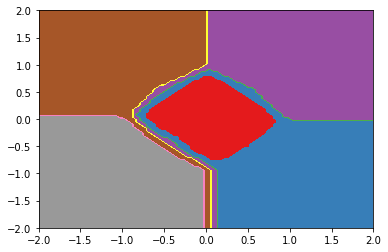

In [45]:
X, Y = np.meshgrid(x_1, x_2)
zs = np.array(fun2(x_1, x_2))
zs = np.around(zs, 0)
Z = zs.reshape(X.shape)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.contourf(X, Y, Z, cmap='Set1')